Предлагается проанализировать некоторые зависимости для данных, взятых из исследования «High School and beyond», посвященного анализу влияния различных параметров на образование.
Целью работы является с помощью модели множественной регрессии оценить влияение различных факторов на число полных лет обучения.


Рассматриваются следующие переменные:
| Переменная | 	Описание                                                                                              |
|------------|--------------------------------------------------------------------------------------------------------|
| ed	     | Число полных лет обучения (для всех минимальное число равно 12)                                        |
| female 	 | = 1, если респондент женщина / = 0, если респондент мужчина                                            |
| black	     | = 1, если респондент принадлежит негроидной расе / = 0, если респондент не принадлежит негроидной расе |
| hispanic	 | = 1, если респондент латиноамериканского происхождения / = 0, в обратном случае                        |
| bytest	 | Результаты теста респондентов в момент выпуска из колледжа (после 12 лет обучения)                     |
| dadcoll 	 | = 1, если отец респондента – выпускник колледжа / = 0, в обратном случае                               |
| momcoll	 | = 1, если мать респондента – выпускник колледжа / = 0, в обратном случае                               |
| incomehi 	 | = 1, если доход семьи превышает $25,000 в год / = 0, если доход семьи ≤ $25,000 в год                  |
| ownhome	 | = 1, если семья владеет домом / = 0, если семья не владеет домом                                       |
| urban  	 | = 1, если школа расположена в городе / = 0, если школа не расположена в городе                         |
| cue80	     | Уровень безработицы в штате в 1980                                                                     |
| stwmfg80   | Утвержденный в штате уровень почасовой оплаты труда в 1980                                             |
| dist 	     | Расстояние до ближайшего колледжа (в 10 миль)                                                          |
| tuition 	 | Средняя по штату стоимость обучения в колледже (в 1000 $)                                              |  



In [96]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import seaborn as sns 
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import linear_reset

#считываем данные из файла CollegeDistance.xls
data = pd.read_excel('CollegeDistance.xls')

In [5]:
print(data.head())

   female  black  hispanic  bytest  dadcoll  momcoll  ownhome  urban  cue80  \
0       0      0         0   39.15        1        0        1      1    6.2   
1       1      0         0   48.87        0        0        1      1    6.2   
2       0      0         0   48.74        0        0        1      1    6.2   
3       0      1         0   40.40        0        0        1      1    6.2   
4       1      0         0   40.48        0        0        0      1    5.6   

   stwmfg80  dist  tuition  ed  incomehi  
0      8.09   0.2  0.88915  12         1  
1      8.09   0.2  0.88915  12         0  
2      8.09   0.2  0.88915  12         0  
3      8.09   0.2  0.88915  12         0  
4      8.09   0.4  0.88915  13         0  


Выводим описательную статистику, чтоб проверить наличие выбросов и накооректности в данных:

In [7]:
print(data.describe())

            female        black     hispanic       bytest      dadcoll  \
count  3796.000000  3796.000000  3796.000000  3796.000000  3796.000000   
mean      0.545311     0.192571     0.149895    51.001931     0.202055   
std       0.498008     0.394371     0.357015     8.819251     0.401586   
min       0.000000     0.000000     0.000000    28.950000     0.000000   
25%       0.000000     0.000000     0.000000    43.867500     0.000000   
50%       1.000000     0.000000     0.000000    51.390000     0.000000   
75%       1.000000     0.000000     0.000000    57.965000     0.000000   
max       1.000000     1.000000     1.000000    71.360000     1.000000   

           momcoll      ownhome        urban        cue80     stwmfg80  \
count  3796.000000  3796.000000  3796.000000  3796.000000  3796.000000   
mean      0.140411     0.819810     0.243941     7.654874     9.556499   
std       0.348972     0.385765     0.429514     2.865770     1.364411   
min       0.000000     0.000000     0

Проверим данные на наличие мултиколлинеарности:

In [88]:
print(data.corr())

            female     black  hispanic    bytest   dadcoll   momcoll  \
female    1.000000  0.044782 -0.033023 -0.072899 -0.038543 -0.014633   
black     0.044782  1.000000 -0.205069 -0.314678 -0.112644 -0.037605   
hispanic -0.033023 -0.205069  1.000000 -0.129896 -0.067946 -0.071686   
bytest   -0.072899 -0.314678 -0.129896  1.000000  0.255860  0.197854   
dadcoll  -0.038543 -0.112644 -0.067946  0.255860  1.000000  0.440555   
momcoll  -0.014633 -0.037605 -0.071686  0.197854  0.440555  1.000000   
ownhome  -0.045273 -0.140784 -0.077435  0.129272  0.076892  0.074461   
urban    -0.004876  0.189288  0.153277 -0.103735 -0.071958 -0.045744   
cue80     0.027642 -0.065542  0.090651 -0.018410 -0.088309 -0.081667   
stwmfg80 -0.031614 -0.162030 -0.033765  0.112651  0.024332 -0.004878   
dist     -0.003369 -0.099893  0.021141 -0.061539 -0.113258 -0.079366   
tuition  -0.001989 -0.020730 -0.266423  0.171807  0.072232  0.040765   
ed       -0.002228 -0.103952 -0.017442  0.476004  0.292974  0.23

Попробуем немного иначе специфицировать модель для более верной интерпретации коэффициента безработицы.

In [89]:
data['ln_ed'] = data['ed'].apply(np.log)
data['ln_cue80'] = data['cue80'].apply(np.log)

/Users/tatanakuznecova/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


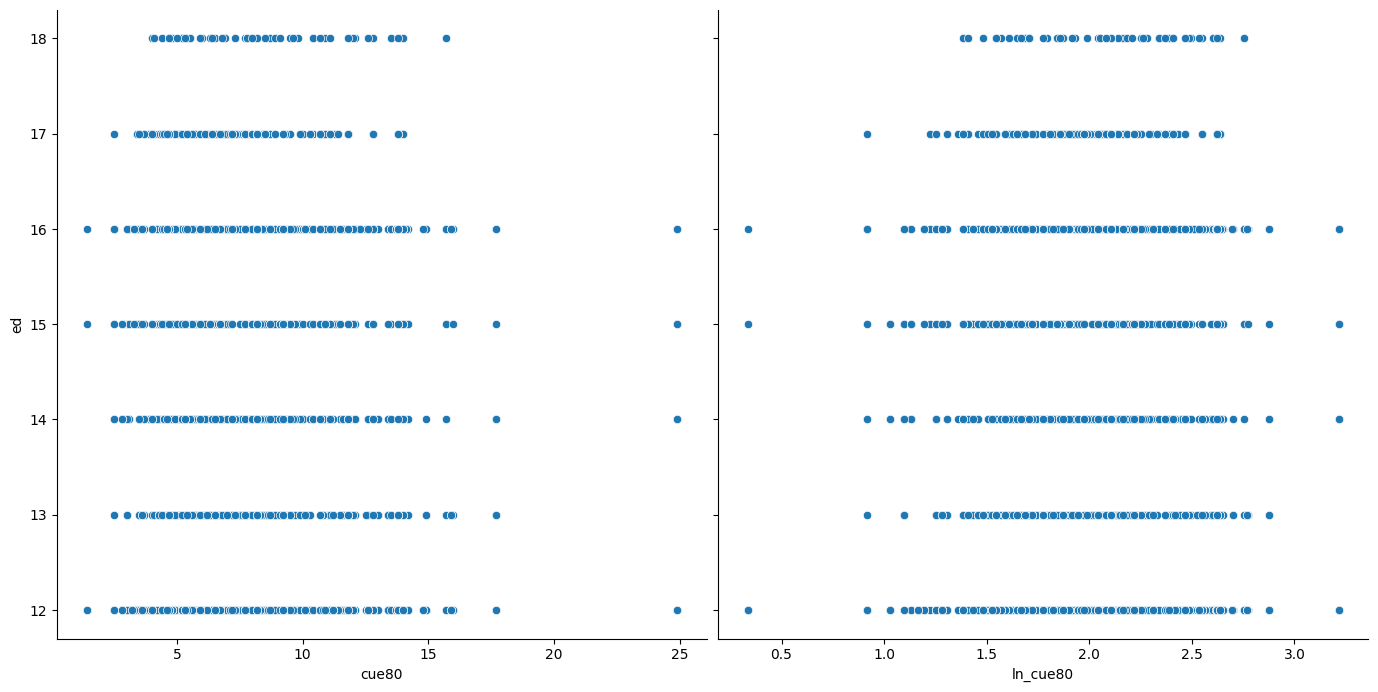

In [91]:
sns.pairplot(
    data,
    y_vars=['ed'],
    x_vars=['cue80', 'ln_cue80'],
    size=7,
    diag_kind=None
)

Построим модель множественной линейной регрессии:

In [92]:
model = smf.ols('ed ~ female + bytest + tuition + black + hispanic + ownhome + momcoll + dadcoll + cue80 + dist', data=data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ed   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     144.0
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          3.41e-256
Time:                        14:18:43   Log-Likelihood:                -7034.5
No. Observations:                3796   AIC:                         1.409e+04
Df Residuals:                    3785   BIC:                         1.416e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6311      0.202     42.637      0.000       8.234       9.028
female         0.1359      0.051      2.682      0.007       0.037       0.235
bytest         0.0934      0.003     29.213      0.000       0.087       0.100
tuition       -0.1996      0.099     -2.012      0.044      -0.394      -0.005
black          0.3361      0.071      4.746      0.000       0.197       0.475
hispanic       0.3363      0.078      4.337      0.000       0.184       0.488
ownhome        0.1635      0.067      2.457      0.014       0.033       0.294
momcoll        0.4132      0.081      5.117      0.000       0.255       0.572
dadcoll        0.6929      0.071      9.699      0.000       0.553       0.833
cue80          0.0211      0.010      2.211      0.027       0.002       0.040
dist          -0.0380      0.013     -2.978      0.003      -0.063      -0.013
==============================================================================
Omnibus:                      120.678   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.263
Skew:                           0.322   Prob(JB):                     2.79e-22
Kurtosis:                       2.537   Cond. No.                         439.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
model = smf.ols('ed ~ female + bytest + tuition + black + hispanic + ownhome + momcoll + dadcoll + ln_cue80 + dist', data=data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ed   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     144.0
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          3.21e-256
Time:                        14:30:54   Log-Likelihood:                -7034.4
No. Observations:                3796   AIC:                         1.409e+04
Df Residuals:                    3785   BIC:                         1.416e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4587      0.230     36.801      0.000       8.008       8.909
female         0.1364      0.051      2.692      0.007       0.037       0.236
bytest         0.0934      0.003     29.223      0.000       0.087       0.100
tuition       -0.2063      0.100     -2.063      0.039      -0.402      -0.010
black          0.3344      0.071      4.722      0.000       0.196       0.473
hispanic       0.3370      0.077      4.351      0.000       0.185       0.489
ownhome        0.1648      0.067      2.477      0.013       0.034       0.295
momcoll        0.4142      0.081      5.128      0.000       0.256       0.573
dadcoll        0.6964      0.072      9.736      0.000       0.556       0.837
ln_cue80       0.1682      0.075      2.238      0.025       0.021       0.316
dist          -0.0354      0.012     -2.840      0.005      -0.060      -0.011
==============================================================================
Omnibus:                      120.910   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.202
Skew:                           0.321   Prob(JB):                     2.87e-22
Kurtosis:                       2.536   Cond. No.                         489.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Проведем тест на гомоскедастичность: (проверим постоянна ли дисперсия случайной ошибки у различных налблюдений)

In [86]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(res.resid, res.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 104.71834285545631),
 ('p-value', 6.1696905256943025e-18),
 ('f-value', 10.73770480073615),
 ('f p-value', 3.419204086764003e-18)]

p-значение достаточно маленькое, значит, отвергаем гипотезу об отсутсвии гетероскедастичности, что свидетельствует о ее наличии. Таким образом оценки в модели получаются несмещенные и состоятельные (предпосылки не нарушены), но оставшиеся оценки некорректны. Тогда введем коррекцию на гетероскедастичность:

In [83]:
model = smf.ols('ed ~ female + bytest + tuition + black + hispanic + ownhome + momcoll + dadcoll + cue80 + dist', data=data)
res=model.fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ed   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     191.7
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:05:25   Log-Likelihood:                -7034.5
No. Observations:                3796   AIC:                         1.409e+04
Df Residuals:                    3785   BIC:                         1.416e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6311      0.187     46.083      0.0

Проведем тест Рамсея для проверки правильности спецификации модели:

H0: модель специфицирована адекватно

H1: нужно менять спецификацию

In [95]:
reset_test = linear_reset(res)
print(reset_test)

<Wald test (chi2): statistic=10.103162755441241, p-value=0.006399205879005599, df_denom=2>


p-значение меньше уровня значимости 


alpha = 0,05 > 0.00644 = р-значение

Значит, отвергаем Н0 и ищем другую спецификацию

Проверим, отличается ли модель для респондентов, чья семья владеет домом, от модели респондентов, чья семья не владеет домом, и определим: нужно ли изучать эти подвыборки отдельно или нет?


Гипотезу на значимость переменной ownhome:


H0: коэффициент при рассматриваемой переменной = 0

In [98]:
t_statistic = res.tvalues['ownhome']
p_value = res.pvalues['ownhome']

print("t-статистика:", t_statistic)
print("p-значение:", p_value)


t-статистика: 2.476647910106582
p-значение: 0.013305649953690138


p-значение меньше t-статистики, значит, отвергаем Н0, переменная оказывается значимой и, таким образом, интересно будет рассмотреть выборки по данной переменной

Дадим интерпретацию переменным female, black, ln_сue80.


Проверка на значимость: критическое значение = 1.96


Female: t расч = 2.8 > 1.96 значимо


Black: t расч = 4.71 > 1.96 значимо


Ln(cue80): t расч = 2.1 > 1.96 значимо 


Женщины в среднем при прочих равных учатся на 0,14 года дольше, чем мужчины.
Люди, принадлежащие негроидной расе в среднем, при прочих равных учатся на 0,33 года дольше, чем люди, не принадлежащие негроидной расе.
При увеличении уровня безработицы на 1 процент, срок обучения увеличивается на 0,0017 года